In [1]:
import glob
import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
#%matplotlib inline
import utils
import metrics_utils
import metrics_utils_mod
#import sys
#sys.path.insert(0, '../src/')

import sparsity_mnist
matplotlib.rcParams.update({'font.size': 15})
is_save = True
figsize = metrics_utils.get_figsize(is_save)

/home/marche/anaconda3/envs/py2/lib/python2.7/site-packages/ot/lp/__init__.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .emd_wrap import emd_c, check_result


toolz.functoolz
toolz
cytoolz.dicttoolz
cytoolz.recipes
cytoolz.functoolz
cytoolz.itertoolz
dask.delayed
dask.delayed
dask.delayed
dask.delayed
dask.delayed
dask.delayed
dask.delayed
dask.delayed
dask.delayed
dask.delayed
dask.delayed
dask.delayed


We compare different traditional approaches with each other: pure lasso, tv norm, PCA with/without normalization, raw dict and wavelet lasso

/homes/numerik/cheng/.local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/homes/numerik/cheng/.local/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/homes/numerik/cheng/.local/lib/python2.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/homes/numerik/cheng/.local/lib/python2.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/homes/numerik/cheng/.local/lib/python2.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


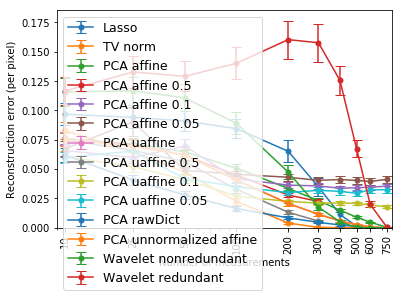

In [3]:
## Define what to plot
criterion = ['l2', 'mean']
retrieve_list = [['l2', 'mean'], ['l2', 'std']]
legend_base_regexs = [
    ('Lasso'  , '../estimated/mnist/full-input/gaussian/0.0/', '/lasso20/*'),
#    ('TV norm FISTA'  , '../estimated/mnist/full-input/gaussian/0.0/', '/tvnorm20/*'),
#    ('TV norm'  , '../estimated/mnist/full-input/gaussian/0.0/', '/tvnorm/0.0_cvxpy-constr-reweight*'),
    ('TV norm'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/tvnorm/0.0_cvxpy-constrEq-reweight1'),
#    ('PCA'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-normalized'),
#ERROR!!!!!!!!!!!!!!!!!!!!!!!
#    ('PCA affine ERROR'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-normalized-*'),
#    ('PCA affine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-own-affine'),
    ('PCA affine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-own-pcafraction1-affine'),
    ('PCA affine 0.5'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-own-pcafraction0.5-affine'),
    ('PCA affine 0.1'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-own-pcafraction0.1-affine'),
    ('PCA affine 0.05'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-own-pcafraction0.05-affine'),
    ('PCA uaffine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-unnormalized-own-pcafraction1-affine'),
    ('PCA uaffine 0.5'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-unnormalized-own-pcafraction0.5-affine'),
    ('PCA uaffine 0.1'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-unnormalized-own-pcafraction0.1-affine'),
    ('PCA uaffine 0.05'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-unnormalized-own-pcafraction0.05-affine'),
    ('PCA rawDict'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-unnormalized-rawDict-pcafraction1-affine'),

#    ('PCA sparseDict'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-sklearnDictionaryLearning50-pcafraction1-affine'),
    
    
#    ('PCA affine II'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-sklearn-affine'),
#    ('PCA affine CVXOPT'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxopt-constrEq-synthesis-reweight1-normalized-*'),
#    ('PCA unnormalized'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-unnormalized'),
    ('PCA unnormalized affine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-unnormalized-*'),
#    ('PCA normalized affine'  , '../../Mark_comparison/results/', '/pca*'),
    ('Wavelet nonredundant'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28'),
#    ('Wavelet redundant'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-synthesis-reweight1-redundant-28'),
    ('Wavelet redundant'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-redundantLowpass-28'),
]
save_path = '../results/conventional_methods.pdf'


## Plot
plt.figure(figsize=figsize)
legends = []
for legend, base, regex in legend_base_regexs:
    metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
    legends.append(legend)
    
#plt.plot([0.075625  , 0.03317602,0.03317602, 0.00895727, 0.00050625,])
## Prettify

# axis
plt.gca().set_ylim(bottom=0)
#plt.gca().set_ylim([0,0.005])
#plt.gca().set_ylim(bottom=0,top=0.02)

plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_xlim([9, 800])

# labels, ticks, titles
ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
plt.xticks(ticks, labels, rotation=90)
plt.ylabel('Reconstruction error (per pixel)')
plt.xlabel('Number of measurements')

# Legend
plt.legend(legends, fontsize=12.5)

# Saving
utils.save_plot(is_save, save_path)

Comparison of the best traditional approaches

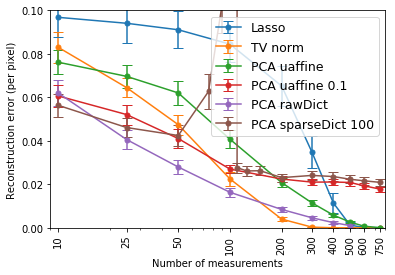

In [3]:
## Define what to plot
criterion = ['l2_losses', 'mean']
retrieve_list = [['l2_losses', 'mean'], ['l2_losses', 'std']]
legend_base_regexs = [
    ('Lasso'  , '../estimated/mnist/full-input/gaussian/0.0/', '/lasso20/*'),
#    ('TV norm FISTA'  , '../estimated/mnist/full-input/gaussian/0.0/', '/tvnorm20/*'),
#    ('TV norm'  , '../estimated/mnist/full-input/gaussian/0.0/', '/tvnorm/0.0_cvxpy-constr-reweight*'),
    ('TV norm'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/tvnorm/0.0_cvxpy-constrEq-reweight1'),
#    ('PCA'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-normalized'),
#ERROR!!!!!!!!!!!!!!!!!!!!!!!
#    ('PCA affine ERROR'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-normalized-*'),
#    ('PCA affine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-own-affine'),
#    ('PCA affine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-own-pcafraction1-affine'),
    ('PCA uaffine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-unnormalized-own-pcafraction1-affine'),
    ('PCA uaffine 0.1'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-unnormalized-own-pcafraction0.1-affine'),
    ('PCA rawDict'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-unnormalized-rawDict-pcafraction1-affine'),

#    ('PCA sparseDict'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-sklearnDictionaryLearning10-samples55000-pcafraction1-affine'),
#    ('PCA sparseDict'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-sklearnDictionaryLearning25-samples55000-pcafraction1-affine'),
#    ('PCA sparseDict'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-sklearnDictionaryLearning50-samples1000-pcafraction1-affine'),
    ('PCA sparseDict 100'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-sklearnDictionaryLearning100-samples1000-pcafraction1-affine'),
]
save_path = '../results/conventional_methods.pdf'


## Plot
plt.figure(figsize=figsize)
legends = []
for legend, base, regex in legend_base_regexs:
    metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
    legends.append(legend)
    
#plt.plot([0.075625  , 0.03317602,0.03317602, 0.00895727, 0.00050625,])
## Prettify

# axis
plt.gca().set_ylim(bottom=0)
plt.gca().set_ylim([0,0.1])
#plt.gca().set_ylim(bottom=0,top=0.02)

plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_xlim([9, 800])

# labels, ticks, titles
ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
plt.xticks(ticks, labels, rotation=90)
plt.ylabel('Reconstruction error (per pixel)')
plt.xlabel('Number of measurements')

# Legend
plt.legend(legends, fontsize=12.5)

# Saving
#utils.save_plot(is_save, save_path)

For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.515625 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.515625 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of 

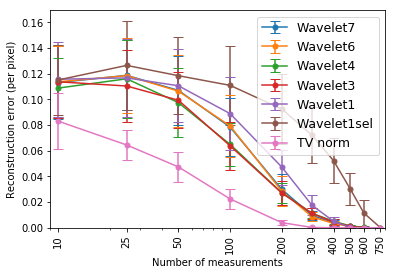

In [11]:
## Define what to plot
criterion = ['l2_losses', 'mean']
retrieve_list = [['l2_losses', 'mean'], ['l2_losses', 'std']]
legend_base_regexs = [
#    ('Lasso'  , '../estimated/mnist/full-input/gaussian/0.0/', '/lasso20/*'),
    ('Wavelet7'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28db7'),
    ('Wavelet6'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28db6'),
    #('Wavelet'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28db5'),
    ('Wavelet4'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28db4'),
    ('Wavelet3'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28db3'),
    #('Wavelet'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28db2'),
    ('Wavelet1'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28db1'),
    ('Wavelet1sel'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28db1selected'),
    ('TV norm'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/tvnorm/0.0_cvxpy-constrEq-reweight1'),
]
save_path = '../results/conventional_methods.pdf'


## Plot
plt.figure(figsize=figsize)
legends = []
for legend, base, regex in legend_base_regexs:
    metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
    legends.append(legend)
    
#plt.plot([0.075625  , 0.03317602,0.03317602, 0.00895727, 0.00050625,])
## Prettify

# axis
plt.gca().set_ylim(bottom=0)
#plt.gca().set_ylim([0,0.1])
#plt.gca().set_ylim(bottom=0,top=0.02)

plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_xlim([9, 800])

# labels, ticks, titles
ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
plt.xticks(ticks, labels, rotation=90)
plt.ylabel('Reconstruction error (per pixel)')
plt.xlabel('Number of measurements')

# Legend
plt.legend(legends, fontsize=12.5)

# Saving
#utils.save_plot(is_save, save_path)

For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.90625 percent of the datapoints
For l2_losses, the errorbars contain 0.515625 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent of the datapoints
For l2_losses, the errorbars contain 0.515625 percent of the datapoints
For l2_losses, the errorbars contain 0.5 percent

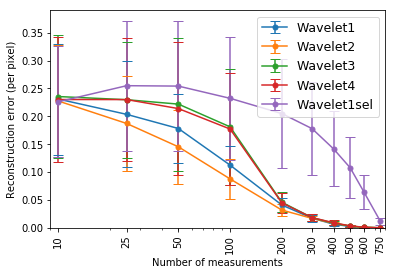

In [18]:
## Define what to plot
criterion = ['l2_losses', 'mean']
retrieve_list = [['l2_losses', 'mean'], ['l2_losses', 'std']]
legend_base_regexs = [
#    ('Lasso'  , '../estimated/mnist/full-input/gaussian/0.0/', '/lasso20/*'),
    ('Wavelet1'  , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28db1'),
    ('Wavelet2'  , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28db2'),
    #('Wavelet'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28db5'),
    ('Wavelet3'  , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28db3'),
    #('Wavelet'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28db2'),
    ('Wavelet4'  , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28db4'),
    ('Wavelet1sel'  , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28db1selected'),
    #('TV norm'  , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/', '/tvnorm/0.0_cvxpy-constrEq-reweight1'),
    #('Lasso'  , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/', '/lasso/0.1_sklearn/'),
]
save_path = '../results/conventional_methods.pdf'


## Plot
plt.figure(figsize=figsize)
legends = []
for legend, base, regex in legend_base_regexs:
    metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
    legends.append(legend)
    
#plt.plot([0.075625  , 0.03317602,0.03317602, 0.00895727, 0.00050625,])
## Prettify

# axis
plt.gca().set_ylim(bottom=0)
#plt.gca().set_ylim([0,0.1])
#plt.gca().set_ylim(bottom=0,top=0.02)

plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_xlim([9, 800])

# labels, ticks, titles
ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
plt.xticks(ticks, labels, rotation=90)
plt.ylabel('Reconstruction error (per pixel)')
plt.xlabel('Number of measurements')

# Legend
plt.legend(legends, fontsize=12.5)

# Saving
#utils.save_plot(is_save, save_path)

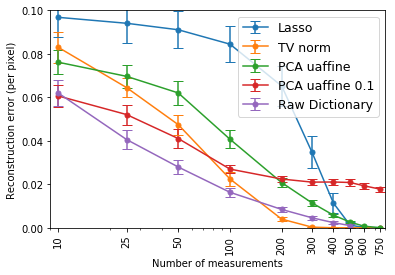

In [4]:
## Define what to plot
criterion = ['l2_losses', 'mean']
retrieve_list = [['l2_losses', 'mean'], ['l2_losses', 'std']]
legend_base_regexs = [
    ('Lasso'  , '../estimated/mnist/full-input/gaussian/0.0/', '/lasso20/*'),
#    ('TV norm FISTA'  , '../estimated/mnist/full-input/gaussian/0.0/', '/tvnorm20/*'),
#    ('TV norm'  , '../estimated/mnist/full-input/gaussian/0.0/', '/tvnorm/0.0_cvxpy-constr-reweight*'),
    ('TV norm'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/tvnorm/0.0_cvxpy-constrEq-reweight1'),
#    ('PCA'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-normalized'),
#ERROR!!!!!!!!!!!!!!!!!!!!!!!
#    ('PCA affine ERROR'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-normalized-*'),
#    ('PCA affine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-own-affine'),
#    ('PCA affine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-own-pcafraction1-affine'),
    ('PCA uaffine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-unnormalized-own-pcafraction1-affine'),
    ('PCA uaffine 0.1'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-unnormalized-own-pcafraction0.1-affine'),
    ('Raw Dictionary'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-unnormalized-rawDict-pcafraction1-affine'),

#    ('PCA sparseDict'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-sklearnDictionaryLearning10-samples55000-pcafraction1-affine'),
#    ('PCA sparseDict'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-sklearnDictionaryLearning25-samples55000-pcafraction1-affine'),
#    ('PCA sparseDict'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-sklearnDictionaryLearning50-samples1000-pcafraction1-affine'),
#    ('PCA sparseDict 100'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-sklearnDictionaryLearning100-samples1000-pcafraction1-affine'),
]
save_path = '../results/conventional_methods.pdf'


## Plot
plt.figure(figsize=figsize)
legends = []
for legend, base, regex in legend_base_regexs:
    metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
    legends.append(legend)
    
#plt.plot([0.075625  , 0.03317602,0.03317602, 0.00895727, 0.00050625,])
## Prettify

# axis
plt.gca().set_ylim(bottom=0)
plt.gca().set_ylim([0,0.1])
#plt.gca().set_ylim(bottom=0,top=0.02)

plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_xlim([9, 800])

# labels, ticks, titles
ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
plt.xticks(ticks, labels, rotation=90)
plt.ylabel('Reconstruction error (per pixel)')
plt.xlabel('Number of measurements')

# Legend
plt.legend(legends, fontsize=12.5)

# Saving
#utils.save_plot(is_save, save_path)

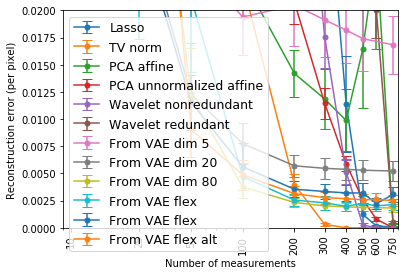

In [9]:
## Define what to plot
criterion = ['l2_losses', 'mean']
retrieve_list = [['l2_losses', 'mean'], ['l2_losses', 'std']]
legend_base_regexs = [
    ('Lasso'  , '../estimated/mnist/full-input/gaussian/0.0/', '/lasso20/*'),
#    ('TV norm FISTA'  , '../estimated/mnist/full-input/gaussian/0.0/', '/tvnorm20/*'),
#    ('TV norm'  , '../estimated/mnist/full-input/gaussian/0.0/', '/tvnorm/0.0_cvxpy-constr-reweight*'),
    ('TV norm'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/tvnorm/0.0_cvxpy-constrEq-reweight1'),
#    ('PCA'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-normalized'),
    ('PCA affine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-normalized-*'),
#    ('PCA affine CVXOPT'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxopt-constrEq-synthesis-reweight1-normalized-*'),
#    ('PCA unnormalized'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-unnormalized'),
    ('PCA unnormalized affine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-unnormalized-*'),
#    ('PCA normalized affine'  , '../../Mark_comparison/results/', '/pca*'),
    ('Wavelet nonredundant'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28'),
    ('Wavelet redundant'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-synthesis-reweight1-redundant-28'),
    ('From VAE dim 5' , '../estimated/mnist/full-input/gaussian/0.0/',    '/vae5/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
#    ('From VAE dim 40' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae40/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
    ('From VAE dim 20' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae20/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
    ('From VAE dim 80' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae80/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
#    ('From VAE dim 100' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae100/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
#    ('From VAE flex' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflexgrid100/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_0.01"),
#    ('From VAE flex' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflex100/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_0.01_5_random"),
#    ('From VAE flex OLD' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflex100/0.0_1.0_0.0_adam_0.1_0.9_False_1001_10_0.01_1_previous-and-random"),
#    ('From VAE flex ' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/old_0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_0.01_1_previous-and-random_flexible"),
    ('From VAE flex ' , '../estimated/mnist/full-input/gaussian-load_standard/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_7.84non-squared_5_previous-and-random_flexible"),
    #('From VAE flex ' , '../estimated/mnist/random-test/gaussian-load_standard/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_7.84non-squared_5_previous-and-random_flexible_unequal"),
    ('From VAE flex ' , '../estimated/mnist/full-input/gaussian-load_standard/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_3.5squared_5_previous-and-random_flexible_unequal"),
    #('From VAE flex ' , '../estimated/mnist/full-input/gaussian-load_standard/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_4.7squared_5_previous-and-random_flexible"),
    ('From VAE flex alt' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflexalt100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_1_previous-and-random_flexible"),    

]
save_path = '../results/mnist_gauss_meas_vae_flexII_otherflex_withlassotv.pdf'


## Plot
plt.figure(figsize=figsize)
legends = []
for legend, base, regex in legend_base_regexs:
    metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
    legends.append(legend)
    
#plt.plot([0.075625  , 0.03317602,0.03317602, 0.00895727, 0.00050625,])
## Prettify

# axis
#plt.gca().set_ylim(bottom=0)
#plt.gca().set_ylim([0,0.005])
plt.gca().set_ylim(bottom=0,top=0.02)

plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_xlim([9, 800])

# labels, ticks, titles
ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
plt.xticks(ticks, labels, rotation=90)
plt.ylabel('Reconstruction error (per pixel)')
plt.xlabel('Number of measurements')

# Legend
plt.legend(legends, fontsize=12.5)

# Saving
#utils.save_plot(is_save, save_path)


Text(0.5,0,'Number of measurements')

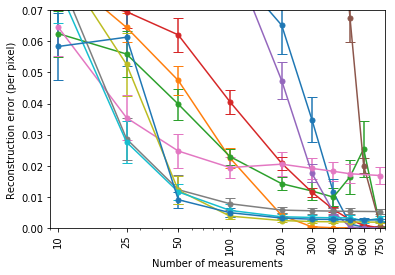

In [15]:
## Define what to plot
criterion = ['l2_losses', 'mean']
retrieve_list = [['l2_losses', 'mean'], ['l2_losses', 'std']]
legend_base_regexs = [
    ('Lasso'  , '../estimated/mnist/full-input/gaussian/0.0/', '/lasso20/*'),
#    ('TV norm FISTA'  , '../estimated/mnist/full-input/gaussian/0.0/', '/tvnorm20/*'),
#    ('TV norm'  , '../estimated/mnist/full-input/gaussian/0.0/', '/tvnorm/0.0_cvxpy-constr-reweight*'),
    ('TV norm'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/tvnorm/0.0_cvxpy-constrEq-reweight1'),
#    ('PCA'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-normalized'),
    ('PCA affine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-normalized-*'),
#    ('PCA affine CVXOPT'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxopt-constrEq-synthesis-reweight1-normalized-*'),
#    ('PCA unnormalized'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-unnormalized'),
    ('PCA unnormalized affine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-unnormalized-*'),
#    ('PCA normalized affine'  , '../../Mark_comparison/results/', '/pca*'),
    ('Wavelet nonredundant'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28'),
    ('Wavelet redundant'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-synthesis-reweight1-redundant-28'),
    ('From VAE dim 5' , '../estimated/mnist/full-input/gaussian/0.0/',    '/vae5/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
#    ('From VAE dim 40' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae40/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
    ('From VAE dim 20' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae20/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
    ('From VAE dim 80' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae80/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
#    ('From VAE dim 100' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae100/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
#    ('From VAE flex' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflexgrid100/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_0.01"),
#    ('From VAE flex' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflex100/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_0.01_5_random"),
#    ('From VAE flex OLD' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflex100/0.0_1.0_0.0_adam_0.1_0.9_False_1001_10_0.01_1_previous-and-random"),
#    ('From VAE flex ' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/old_0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_0.01_1_previous-and-random_flexible"),
    #('From VAE flex ' , '../estimated/mnist/full-input/gaussian-load_standard/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_7.84non-squared_5_previous-and-random_flexible"),
    #('From VAE flex ' , '../estimated/mnist/random-test/gaussian-load_standard/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_7.84non-squared_5_previous-and-random_flexible_unequal"),
    ('From VAE flex ' , '../estimated/mnist/full-input/gaussian-load_standard/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_3.5squared_5_previous-and-random_flexible_unequal"),
    #('From VAE flex ' , '../estimated/mnist/full-input/gaussian-load_standard/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_4.7squared_5_previous-and-random_flexible"),
    ('From VAE flex alt' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflexalt100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_1_previous-and-random_flexible"),    

]
save_path = '../results/mnist_gauss_meas_vae_flexII_otherflex_withlassotv.pdf'


## Plot
plt.figure(figsize=figsize)
legends = []
for legend, base, regex in legend_base_regexs:
    metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
    legends.append(legend)
    
#plt.plot([0.075625  , 0.03317602,0.03317602, 0.00895727, 0.00050625,])
## Prettify

# axis
#plt.gca().set_ylim(bottom=0)
#plt.gca().set_ylim([0,0.005])
plt.gca().set_ylim(bottom=0,top=0.07)

plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_xlim([9, 800])

# labels, ticks, titles
ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
plt.xticks(ticks, labels, rotation=90)
plt.ylabel('Reconstruction error (per pixel)')
plt.xlabel('Number of measurements')

# Legend
#plt.legend(legends, fontsize=12.5)

# Saving
#utils.save_plot(is_save, save_path)


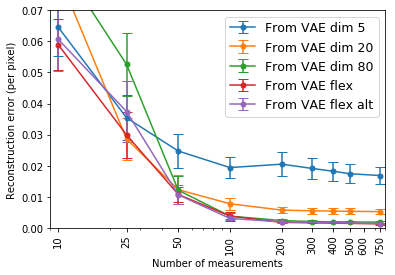

In [20]:
## Define what to plot
criterion = ['l2_losses', 'mean']
retrieve_list = [['l2_losses', 'mean'], ['l2_losses', 'std']]
legend_base_regexs = [
    #('Lasso'  , '../estimated/mnist/full-input/gaussian/0.0/', '/lasso20/*'),
    #('TV norm'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/tvnorm/0.0_cvxpy-constrEq-reweight1'),
    #('PCA affine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-normalized-*'),
    #('PCA unnormalized affine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-unnormalized-*'),
    #('Wavelet nonredundant'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-reweight1-synthesis-nonredundant-28'),
    #('Wavelet redundant'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassowavelet/0.0_cvxpy-constrEq-synthesis-reweight1-redundant-28'),
    ('From VAE dim 5' , '../estimated/mnist/full-input/gaussian/0.0/',    '/vae5/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
    ('From VAE dim 20' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae20/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
    ('From VAE dim 80' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae80/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
    ('From VAE flex ' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_7.84non-squared_5_previous-and-random_flexible_unequal_1"),
    ('From VAE flex alt' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/' ,    "/vaeflexalt5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_7.84non-squaredstrict_5_previous-and-random_flexible_unequal_1"),    

]
save_path = '../results/mnist_gauss_meas_vae_flexII_otherflex_withlassotv.pdf'


## Plot
plt.figure(figsize=figsize)
legends = []
for legend, base, regex in legend_base_regexs:
    metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
    legends.append(legend)
    
#plt.plot([0.075625  , 0.03317602,0.03317602, 0.00895727, 0.00050625,])
## Prettify

# axis
#plt.gca().set_ylim(bottom=0)
#plt.gca().set_ylim([0,0.005])
plt.gca().set_ylim(bottom=0,top=0.07)

plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_xlim([9, 800])

# labels, ticks, titles
ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
plt.xticks(ticks, labels, rotation=90)
plt.ylabel('Reconstruction error (per pixel)')
plt.xlabel('Number of measurements')

# Legend
plt.legend(legends, fontsize=12.5)

# Saving
#utils.save_plot(is_save, save_path)


Different latent dimension yield different reconstruction errors - small dimensions is good for small number of measurements and high dimension for high number of measurements

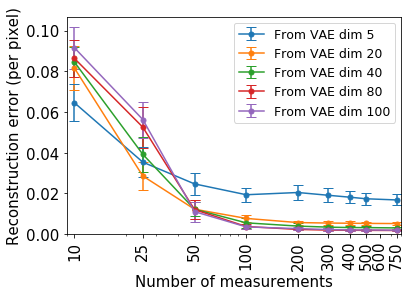

In [32]:
## Define what to plot
criterion = ['l2_losses', 'mean']
retrieve_list = [['l2_losses', 'mean'], ['l2_losses', 'std']]
legend_base_regexs = [
    ('From VAE dim 5' , '../estimated/mnist/full-input/gaussian/0.0/',    '/vae5/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
    ('From VAE dim 20' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae20/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
    ('From VAE dim 40' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae40/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
    ('From VAE dim 80' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae80/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
    ('From VAE dim 100' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae100/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
]
save_path = '../results/Different_latent_dimensions.pdf'


## Plot
plt.figure(figsize=figsize)
legends = []
for legend, base, regex in legend_base_regexs:
    metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
    legends.append(legend)
    
#plt.plot([0.075625  , 0.03317602,0.03317602, 0.00895727, 0.00050625,])
## Prettify

# axis
plt.gca().set_ylim(bottom=0)
#plt.gca().set_ylim([0,0.005])
#plt.gca().set_ylim(bottom=0,top=0.003)

plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_xlim([9, 800])

# labels, ticks, titles
ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
plt.xticks(ticks, labels, rotation=90)
plt.ylabel('Reconstruction error (per pixel)')
plt.xlabel('Number of measurements')

# Legend
plt.legend(legends, fontsize=12.5)

# Saving
utils.save_plot(is_save, save_path)


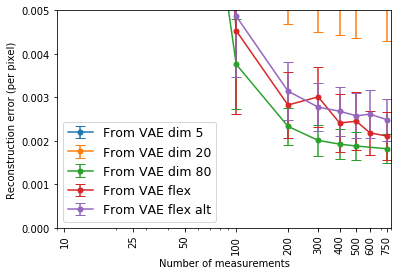

In [11]:
## Define what to plot
criterion = ['l2_losses', 'mean']
retrieve_list = [['l2_losses', 'mean'], ['l2_losses', 'std']]
legend_base_regexs = [
    ('From VAE dim 5' , '../estimated/mnist/full-input/gaussian/0.0/',    '/vae5/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
#    ('From VAE dim 40' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae40/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
    ('From VAE dim 20' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae20/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
    ('From VAE dim 80' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae80/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
#    ('From VAE dim 100' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae100/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
#    ('From VAE flex' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflexgrid100/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_0.01"),
#    ('From VAE flex' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflex100/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_0.01_5_random"),
#    ('From VAE flex OLD' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflex100/0.0_1.0_0.0_adam_0.1_0.9_False_1001_10_0.01_1_previous-and-random"),
#    ('From VAE flex ' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/old_0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_0.01_1_previous-and-random_flexible"),
    #('From VAE flex ' , '../estimated/mnist/full-input/gaussian-load_standard/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_7.84non-squared_5_previous-and-random_flexible"),
    #('From VAE flex RANDOM' , '../estimated/mnist/random-test/gaussian-load_standard/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_7.84non-squared_5_previous-and-random_flexible_unequal"),
    ('From VAE flex ' , '../estimated/mnist/full-input/gaussian-load_standard/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_3.0squared_5_previous-and-random_flexible_unequal"),
    #('From VAE flex ' , '../estimated/mnist/full-input/gaussian-load_standard/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_4.7squared_5_previous-and-random_flexible"),
    ('From VAE flex alt' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflexalt100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_1_previous-and-random_flexible"),    
#3.0 chooses the best latent dimension, but does not output the best
]
save_path = '../results/mnist_gauss_meas_vae_flexII_otherflex_withlassotv.pdf'


## Plot
plt.figure(figsize=figsize)
legends = []
for legend, base, regex in legend_base_regexs:
    metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
    legends.append(legend)
    
#plt.plot([0.075625  , 0.03317602,0.03317602, 0.00895727, 0.00050625,])
## Prettify

# axis
#plt.gca().set_ylim(bottom=0)
plt.gca().set_ylim([0,0.005])
#plt.gca().set_ylim(bottom=0,top=0.003)

plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_xlim([9, 800])

# labels, ticks, titles
ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
plt.xticks(ticks, labels, rotation=90)
plt.ylabel('Reconstruction error (per pixel)')
plt.xlabel('Number of measurements')

# Legend
plt.legend(legends, fontsize=12.5)

# Saving
#utils.save_plot(is_save, save_path)


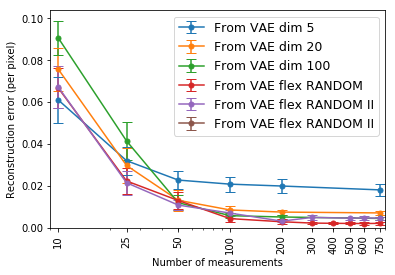

In [29]:
## Define what to plot
criterion = ['l2_losses', 'mean']
retrieve_list = [['l2_losses', 'mean'], ['l2_losses', 'std']]
legend_base_regexs = [
    ('From VAE dim 5' , '../estimated/mnist/random-test_2019/gaussian-load_standard/0.0/',    '/vaeflex5/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01non-squared_1_previous-and-random_5_unequal'),
    ('From VAE dim 20' , '../estimated/mnist/random-test_2019/gaussian-load_standard/0.0/' ,    '/vaeflex20/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01non-squared_1_previous-and-random_20_unequal'),
    ('From VAE dim 100' , '../estimated/mnist/random-test_2019/gaussian-load_standard/0.0/' ,    '/vaeflex100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01non-squared_1_previous-and-random_100_unequal'),
    ('From VAE flex RANDOM' , '../estimated/mnist/random-test_2019/gaussian-load_standard/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_7.84non-squared_5_previous-and-random_flexible_unequal"),
    ('From VAE flex RANDOM II' , '../estimated/mnist/random-test_2019/gaussian-load_standard/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_3.85squared_5_previous-and-random_flexible_unequal"),
    ('From VAE flex RANDOM II' , '../estimated/mnist/random-test_2019/gaussian-load_standard/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_3.0squared_5_previous-and-random_flexible_unequal"),
#???3.0 chooses the best latent dimension, but does not output the best???
]
save_path = '../results/mnist_gauss_meas_vae_flexII_otherflex_withlassotv.pdf'


## Plot
plt.figure(figsize=figsize)
legends = []
for legend, base, regex in legend_base_regexs:
    metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
    legends.append(legend)
    
#plt.plot([0.075625  , 0.03317602,0.03317602, 0.00895727, 0.00050625,])
## Prettify

# axis
plt.gca().set_ylim(bottom=0)
#plt.gca().set_ylim([0,0.005])
#plt.gca().set_ylim(bottom=0,top=0.003)

plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_xlim([9, 800])

# labels, ticks, titles
ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
plt.xticks(ticks, labels, rotation=90)
plt.ylabel('Reconstruction error (per pixel)')
plt.xlabel('Number of measurements')

# Legend
plt.legend(legends, fontsize=12.5)

# Saving
#utils.save_plot(is_save, save_path)


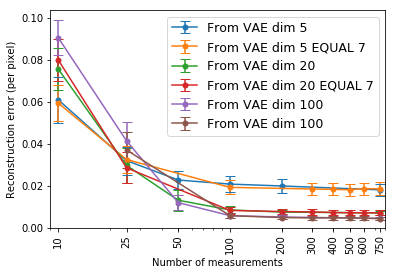

In [10]:
## Define what to plot
criterion = ['l2_losses', 'mean']
retrieve_list = [['l2_losses', 'mean'], ['l2_losses', 'std']]
legend_base_regexs = [
    ('From VAE dim 5' , '../estimated/mnist/random-test_2019/gaussian-load_standard/0.0/',    '/vaeflex5/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01non-squared_1_previous-and-random_5_unequal'),
    #('From VAE dim 5 EQUAL 2' , '../estimated/mnist/random-test_2019/gaussian-load_standard/0.0/',    '/vaeflex5/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01non-squared_1_previous-and-random_5_2'),
    ('From VAE dim 5 EQUAL 7' , '../estimated/mnist/random-test_2019/gaussian-load_standard/0.0/',    '/vaeflex5/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01non-squared_1_previous-and-random_5_7'),
    ('From VAE dim 20' , '../estimated/mnist/random-test_2019/gaussian-load_standard/0.0/' ,    '/vaeflex20/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01non-squared_1_previous-and-random_20_unequal'),
    #('From VAE dim 20 EQUAL' , '../estimated/mnist/random-test_2019/gaussian-load_standard/0.0/' ,    '/vaeflex20/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01non-squared_1_previous-and-random_20_2'),
    ('From VAE dim 20 EQUAL 7' , '../estimated/mnist/random-test_2019/gaussian-load_standard/0.0/' ,    '/vaeflex20/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01non-squared_1_previous-and-random_20_7'),
    ('From VAE dim 100' , '../estimated/mnist/random-test_2019/gaussian-load_standard/0.0/' ,    '/vaeflex100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01non-squared_1_previous-and-random_100_unequal'),
    ('From VAE dim 100' , '../estimated/mnist/random-test_2019/gaussian-load_standard/0.0/' ,    '/vaeflex100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01non-squared_1_previous-and-random_100_7'),

]
save_path = '../results/mnist_gauss_meas_vae_flexII_otherflex_withlassotv.pdf'


## Plot
plt.figure(figsize=figsize)
legends = []
for legend, base, regex in legend_base_regexs:
    metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
    legends.append(legend)
    
#plt.plot([0.075625  , 0.03317602,0.03317602, 0.00895727, 0.00050625,])
## Prettify

# axis
plt.gca().set_ylim(bottom=0)
#plt.gca().set_ylim([0,0.005])
#plt.gca().set_ylim(bottom=0,top=0.003)

plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_xlim([9, 800])

# labels, ticks, titles
ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
plt.xticks(ticks, labels, rotation=90)
plt.ylabel('Reconstruction error (per pixel)')
plt.xlabel('Number of measurements')

# Legend
plt.legend(legends, fontsize=12.5)

# Saving
#utils.save_plot(is_save, save_path)


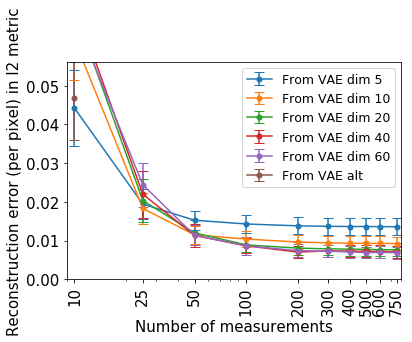

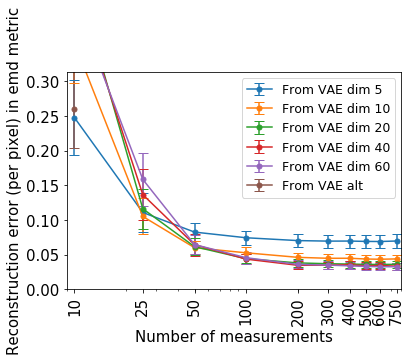

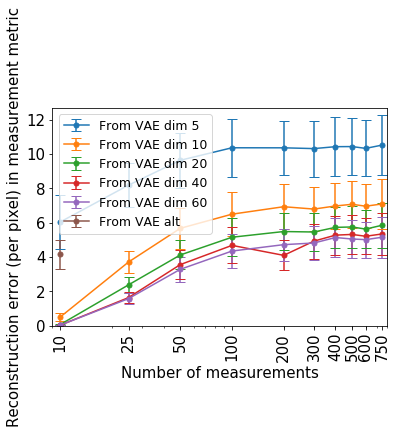

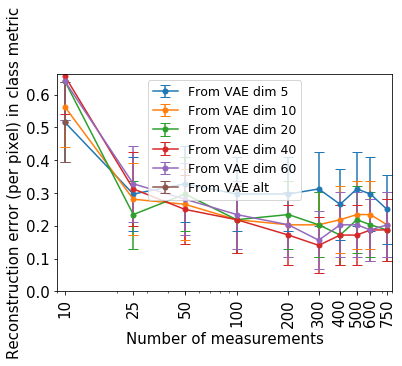

In [22]:
## Define what to plot
criterion_list = [['l2_losses', 'mean'],['emd_losses', 'mean'],['measurement_losses', 'mean'],['class_losses', 'mean']]
retrieve_list_list = [[['l2_losses', 'mean'], ['l2_losses', 'std']],[['emd_losses', 'mean'], ['emd_losses', 'std']],[['measurement_losses', 'mean'], ['measurement_losses', 'std']],[['class_losses', 'mean'], ['class_losses', 'std']]]
labels_metric = ['l2','emd','measurement','class']
legend_base_regexs = [
#    ('TV norm'  , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/', '/tvnorm/0.0_cvxpy-constrEq-reweight1'),    
    ('From VAE dim 5' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/',    '/VAEfixed5/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_1_previous-and-random_5'),
    ('From VAE dim 10' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEfixed10/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_1_previous-and-random_10'),
    ('From VAE dim 20' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEfixed20/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_1_previous-and-random_20'),
    ('From VAE dim 40' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEfixed40/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_1_previous-and-random_40'),
    ('From VAE dim 60' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEfixed60/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_1_previous-and-random_60'),
#    ('From VAE alt' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEflexalt5-10-20-40-60/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.005squaredstrict_5_previous-and-random_flexible'),
#    ('From VAE alt' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEflexalt5-10-20-40-60/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.0075squaredstrict_5_previous-and-random_flexible'),
#    ('From VAE alt' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEflexalt5-10-20-40-60/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.008squaredstrict_5_previous-and-random_flexible'),
#    ('From VAE alt' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEflex20-40-60/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.005squared_5_previous-and-random_flexible'),
    ('From VAE alt' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEflexalt5-10-20-40-60-100-200-250-784/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_7.84non-squaredstrict_5_previous-and-random_flexible_unequal_1'),
]
save_path = '../results/mnist_gauss_meas_vae_flexII_otherflex_withlassotv.pdf'


## Plot
for i in range(len(criterion_list)):
    criterion = criterion_list[i]
    retrieve_list = retrieve_list_list[i]
    plt.figure(figsize=figsize)
    legends = []
    for legend, base, regex in legend_base_regexs:
        metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
        legends.append(legend)

        plt.gca().set_ylim(bottom=0)

    plt.gca().set_xscale("log", nonposx='clip')
    plt.gca().set_xlim([9, 800])

    # labels, ticks, titles
    ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
    labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
    plt.xticks(ticks, labels, rotation=90)
    plt.ylabel('Reconstruction error (per pixel) in {} metric'.format(labels_metric[i]))
    plt.xlabel('Number of measurements')

    # Legend
    plt.legend(legends, fontsize=12.5)

# Saving
#utils.save_plot(is_save, save_path)


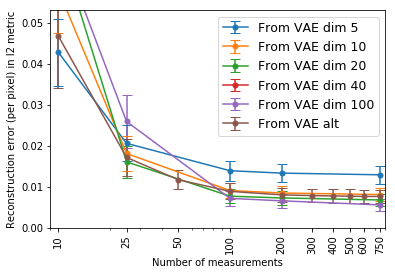

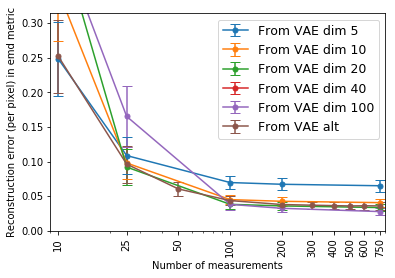

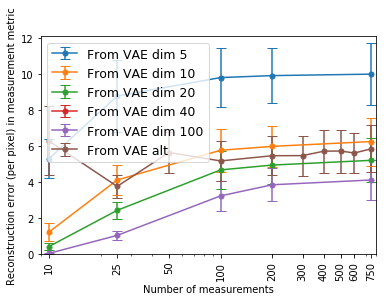

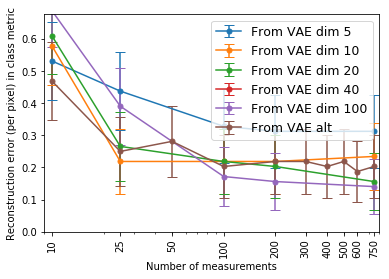

In [19]:
## Define what to plot
criterion_list = [['l2_losses', 'mean'],['emd_losses', 'mean'],['measurement_losses', 'mean'],['class_losses', 'mean']]
retrieve_list_list = [[['l2_losses', 'mean'], ['l2_losses', 'std']],[['emd_losses', 'mean'], ['emd_losses', 'std']],[['measurement_losses', 'mean'], ['measurement_losses', 'std']],[['class_losses', 'mean'], ['class_losses', 'std']]]
labels_metric = ['l2','emd','measurement','class']
legend_base_regexs = [
#    ('TV norm'  , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/', '/tvnorm/0.0_cvxpy-constrEq-reweight1'),    
    ('From VAE dim 5' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/',    '/VAEflex5-10-20-40-60-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.008squared_1_previous-and-random_5'),
    ('From VAE dim 10' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEflex5-10-20-40-60-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.008squared_1_previous-and-random_10'),
    ('From VAE dim 20' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEflex5-10-20-40-60-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.008squared_1_previous-and-random_20'),
    ('From VAE dim 100' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEflex5-10-20-40-60-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.008squared_1_previous-and-random_100'),
#    ('From VAE alt' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEflexalt5-10-20-40-60/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.005squaredstrict_5_previous-and-random_flexible'),
#    ('From VAE alt' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEflexalt5-10-20-40-60/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.0085squaredstrict_5_previous-and-random_flexible'),
#    ('From VAE alt' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEflexalt5-10-20-40-60/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.008squaredstrict_5_previous-and-random_flexible'),
    ('From VAE alt' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEflex20-40-60/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.005squared_5_previous-and-random_flexible'),
]
save_path = '../results/mnist_gauss_meas_vae_flexII_otherflex_withlassotv.pdf'


## Plot
for i in range(len(criterion_list)):
    criterion = criterion_list[i]
    retrieve_list = retrieve_list_list[i]
    plt.figure(figsize=figsize)
    legends = []
    for legend, base, regex in legend_base_regexs:
        metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
        legends.append(legend)

        plt.gca().set_ylim(bottom=0)

    plt.gca().set_xscale("log", nonposx='clip')
    plt.gca().set_xlim([9, 800])

    # labels, ticks, titles
    ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
    labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
    plt.xticks(ticks, labels, rotation=90)
    plt.ylabel('Reconstruction error (per pixel) in {} metric'.format(labels_metric[i]))
    plt.xlabel('Number of measurements')

    # Legend
    plt.legend(legends, fontsize=12.5)

# Saving
#utils.save_plot(is_save, save_path)


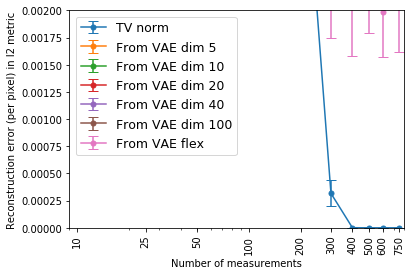

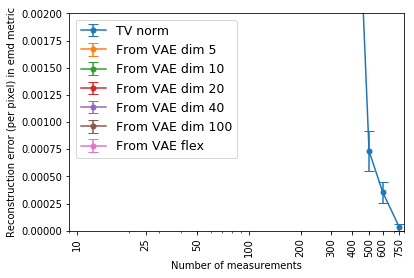

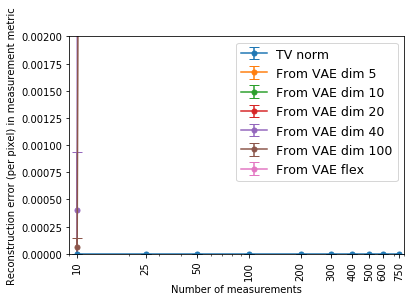

In [21]:
## Define what to plot
criterion_list = [['l2_losses', 'mean'],['emd_losses', 'mean'],['measurement_losses', 'mean']]
retrieve_list_list = [[['l2_losses', 'mean'], ['l2_losses', 'std']],[['emd_losses', 'mean'], ['emd_losses', 'std']],[['measurement_losses', 'mean'], ['measurement_losses', 'std']]]
labels_metric = ['l2','emd','measurement']
legend_base_regexs = [
    ('TV norm'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/tvnorm/0.0_cvxpy-constrEq-reweight1'),    
    ('From VAE dim 5' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/',    '/vaeflex5/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_1_previous-and-random_5'),
    ('From VAE dim 10' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/' ,    '/vaeflex10/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_3_previous-and-random_10'),
    ('From VAE dim 20' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/' ,    '/vaeflex20/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_5_previous-and-random_20'),
    ('From VAE dim 40' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/' ,    '/vaeflex40/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_5_previous-and-random_40'),
#    ('From VAE dim 60' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/' ,    '/vaeflex60/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_5_previous-and-random_60'),
#    ('From VAE dim 80' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/' ,    '/vaeflex80/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_5_previous-and-random_80'),
    ('From VAE dim 100' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/' ,    '/vaeflex100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_5_previous-and-random_100'),
    ('From VAE flex' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/' ,    '/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_5_previous-and-random_flexible'),
#    ('From VAE flex' , '../estimated/mnist/full-input/gaussian-standard/0.0/' ,    '/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.006squared_5_previous-and-random_flexible'),
]
save_path = '../results/mnist_gauss_meas_vae_flexII_otherflex_withlassotv.pdf'


## Plot
for i in range(len(criterion_list)):
    criterion = criterion_list[i]
    retrieve_list = retrieve_list_list[i]
    plt.figure(figsize=figsize)
    legends = []
    for legend, base, regex in legend_base_regexs:
        metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
        plt.gca().set_xscale("log", nonposx='clip')
        legends.append(legend)

        plt.gca().set_ylim(bottom=0,top=0.002)

    plt.gca().set_xscale("log", nonposx='clip')
    plt.gca().set_xlim([9, 800])

    # labels, ticks, titles
    ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
    labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
    plt.xticks(ticks, labels, rotation=90)
    plt.ylabel('Reconstruction error (per pixel) in {} metric'.format(labels_metric[i]))
    plt.xlabel('Number of measurements')

    # Legend
    plt.legend(legends, fontsize=12.5)

# Saving
#utils.save_plot(is_save, save_path)


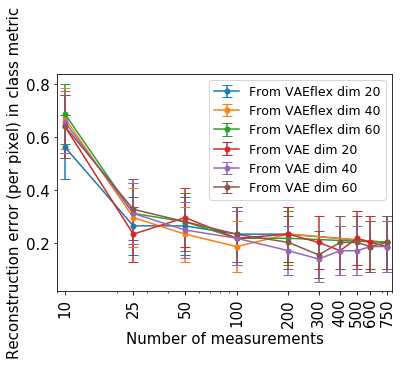

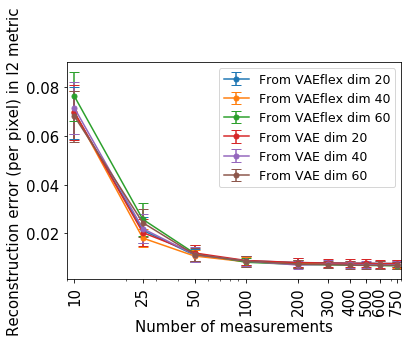

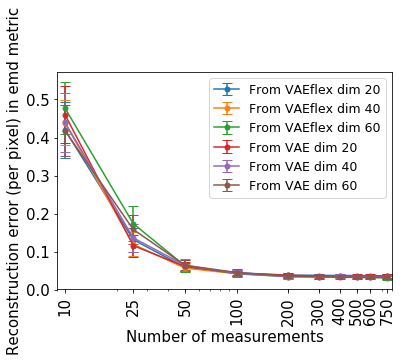

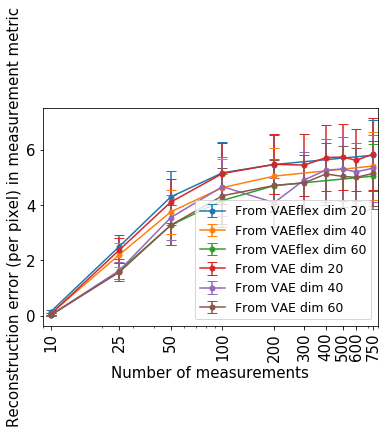

In [18]:
## Define what to plot
criterion_list = [['class_losses', 'mean'],['l2_losses', 'mean'],['emd_losses', 'mean'],['measurement_losses', 'mean']]
retrieve_list_list = [[['class_losses', 'mean'], ['class_losses', 'std']],[['l2_losses', 'mean'], ['l2_losses', 'std']],[['emd_losses', 'mean'], ['emd_losses', 'std']],[['measurement_losses', 'mean'], ['measurement_losses', 'std']]]
labels_metric = ['class','l2','emd','measurement']
legend_base_regexs = [
    ('From VAEflex dim 20' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEflex20-40-60/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01non-squared_1_previous-and-random_20'),
    ('From VAEflex dim 40' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEflex20-40-60/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01non-squared_1_previous-and-random_40'),
    ('From VAEflex dim 60' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEflex20-40-60/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01non-squared_1_previous-and-random_60'),
    ('From VAE dim 20' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEfixed20/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_1_previous-and-random_20'),
    ('From VAE dim 40' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEfixed40/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_1_previous-and-random_40'),
    ('From VAE dim 60' , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/' ,    '/VAEfixed60/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_1_previous-and-random_60'),

]
save_path = '../results/mnist_gauss_meas_vae_flexII_otherflex_withlassotv.pdf'


## Plot
for i in range(len(criterion_list)):
    criterion = criterion_list[i]
    retrieve_list = retrieve_list_list[i]
    plt.figure(figsize=figsize)
    legends = []
    for legend, base, regex in legend_base_regexs:
        metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
        plt.gca().set_xscale("log", nonposx='clip')
        legends.append(legend)

#        plt.gca().set_ylim(bottom=0,top=0.02)

    plt.gca().set_xscale("log", nonposx='clip')
    plt.gca().set_xlim([9, 800])

    # labels, ticks, titles
    ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
    labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
    plt.xticks(ticks, labels, rotation=90)
    plt.ylabel('Reconstruction error (per pixel) in {} metric'.format(labels_metric[i]))
    plt.xlabel('Number of measurements')

    # Legend
    plt.legend(legends, fontsize=12.5)

# Saving
#utils.save_plot(is_save, save_path)


[{100: 14.174717000139724, 200: 13.383217568443204, 10: 4.874770748147698, 300: 12.39159001225195, 750: 14.125367547003805, 50: 12.94221333398794, 500: 13.333350818519936, 600: 13.433925823780614, 25: 10.578122347956686}, {100: 5.693252250963931, 200: 6.042554475422776, 10: 0.23924675117858357, 300: 6.099616803143175, 750: 6.176533009148356, 400: 6.128317908801583, 50: 4.943267668716108, 500: 6.084844086087852, 600: 6.260407954163815, 25: 3.3947420810093427}, {100: 4.536338744134018, 200: 4.6955046916533885, 10: 0.05635858655484091, 300: 4.929461856209318, 750: 5.1026893875330686, 400: 4.997907038733802, 50: 3.643207558942749, 500: 5.0396943091573565, 600: 5.03358568121803, 25: 2.5449457847122634}, {200: 3.024853145227238, 10: 0.00039969451488941206, 300: 3.1207040776481945, 750: 3.280615739052955, 400: 3.269196990630448, 50: 2.0542601849888236, 500: 3.2365736475120115, 600: 3.2439250683004426, 25: 1.1884024059552316}, {100: 1.904664341267561, 200: 2.165893814435702, 10: 2.335667530571

(0, 0.00075)

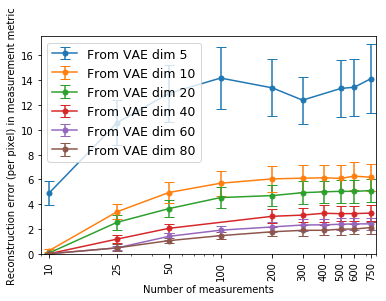

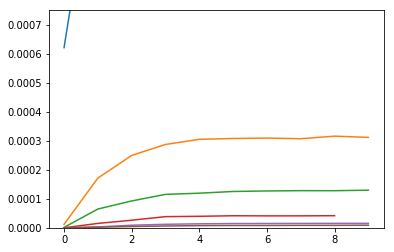

In [20]:
## Define what to plot
criterion_list = [['measurement_losses', 'mean']]
retrieve_list_list = [[['measurement_losses', 'mean'], ['measurement_losses', 'std']]]
labels_metric = ['measurement']
legend_base_regexs = [
#    ('TV norm'  , '../estimated/fashion-mnist/full-input/gaussian-reproducible/0.0/', '/tvnorm/0.0_cvxpy-constrEq-reweight1'),    
    ('From VAE dim 5' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/',    '/vaeflex5/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_1_previous-and-random_5'),
    ('From VAE dim 10' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/' ,    '/vaeflex10/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_3_previous-and-random_10'),
    ('From VAE dim 20' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/' ,    '/vaeflex20/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_5_previous-and-random_20'),
    ('From VAE dim 40' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/' ,    '/vaeflex40/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_5_previous-and-random_40'),
    ('From VAE dim 60' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/' ,    '/vaeflex60/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_5_previous-and-random_60'),
    ('From VAE dim 80' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/' ,    '/vaeflex80/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_5_previous-and-random_80'),

]
save_path = '../results/mnist_gauss_meas_vae_flexII_otherflex_withlassotv.pdf'

import numpy as np

## Plot
val_list = []
a_val = []
for i in range(len(criterion_list)):
    criterion = criterion_list[i]
    retrieve_list = retrieve_list_list[i]
    plt.figure(figsize=figsize)
    legends = []
    for legend, base, regex in legend_base_regexs:
        val = metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
        val_list.append(val)
        legends.append(legend)

        plt.gca().set_ylim(bottom=0)

    plt.gca().set_xscale("log", nonposx='clip')
    plt.gca().set_xlim([9, 800])

    # labels, ticks, titles
    ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
    labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
    plt.xticks(ticks, labels, rotation=90)
    plt.ylabel('Reconstruction error (per pixel) in {} metric'.format(labels_metric[i]))
    plt.xlabel('Number of measurements')

    # Legend
    plt.legend(legends, fontsize=12.5)
print val_list
for i in sorted(val_list[0].keys()):
    A = np.load('../estimated/mnist/full-input/gaussian-reproducible/0.0/{}/vaeflex60/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_5_previous-and-random_60/A.npy'.format(i))
    a_val.append(np.linalg.norm(A)**2)
plt.figure(figsize=figsize)
for i in range(len(val_list)):
    val = val_list[i]
    val = [val[key] for key in sorted(val.keys())]
    plt.plot(val/a_val[i])
plt.gca().set_ylim([0,0.00075])
# Saving
#utils.save_plot(is_save, save_path)


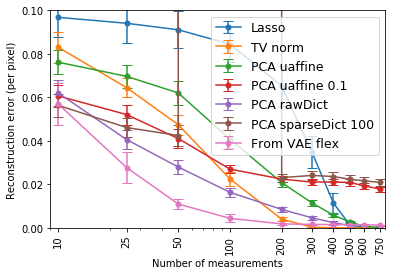

In [25]:
## Define what to plot
criterion = ['l2', 'mean']
retrieve_list = [['l2', 'mean'], ['l2', 'std']]
legend_base_regexs = [
    ('Lasso'  , '../estimated/mnist/full-input/gaussian/0.0/', '/lasso20/*'),
#    ('TV norm FISTA'  , '../estimated/mnist/full-input/gaussian/0.0/', '/tvnorm20/*'),
#    ('TV norm'  , '../estimated/mnist/full-input/gaussian/0.0/', '/tvnorm/0.0_cvxpy-constr-reweight*'),
    ('TV norm'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/tvnorm/0.0_cvxpy-constrEq-reweight1'),
#    ('PCA'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-normalized'),
#ERROR!!!!!!!!!!!!!!!!!!!!!!!
#    ('PCA affine ERROR'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-synthesis-reweight1-normalized-*'),
#    ('PCA affine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-own-affine'),
#    ('PCA affine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-own-pcafraction1-affine'),
    ('PCA uaffine'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-unnormalized-own-pcafraction1-affine'),
    ('PCA uaffine 0.1'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-unnormalized-own-pcafraction0.1-affine'),
    ('PCA rawDict'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-unnormalized-rawDict-pcafraction1-affine'),

#    ('PCA sparseDict'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-sklearnDictionaryLearning10-samples55000-pcafraction1-affine'),
#    ('PCA sparseDict'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-sklearnDictionaryLearning25-samples55000-pcafraction1-affine'),
#    ('PCA sparseDict'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-sklearnDictionaryLearning50-samples1000-pcafraction1-affine'),
    ('PCA sparseDict 100'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/lassopca/0.0_cvxpy-constrEq-reweight1-synthesis-normalized-sklearnDictionaryLearning100-samples1000-pcafraction1-affine'),

#    ('From VAE dim 5' , '../estimated/mnist/full-input/gaussian/0.0/',    '/vae5/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
#    ('From VAE dim 40' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae40/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
#    ('From VAE dim 20' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae20/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
#    ('From VAE dim 80' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae80/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
#    ('From VAE dim 100' , '../estimated/mnist/full-input/gaussian/0.0/' ,    '/vae100/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10'),
#    ('From VAE flex' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflexgrid100/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_0.01"),
#    ('From VAE flex' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflex100/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_0.01_5_random"),
#    ('From VAE flex OLD' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflex100/0.0_1.0_0.0_adam_0.1_0.9_False_1001_10_0.01_1_previous-and-random"),
    ('From VAE flex ' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.1_0.9_False_1000_10_0.01_1_previous-and-random_flexible"),
#    ('From VAE flex alt' , '../estimated/mnist/full-input/gaussian/0.0/' ,    "/vaeflexalt100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_1_previous-and-random_flexible"),    

]
save_path = '../results/mnist_gauss_grand_comparison.pdf'


## Plot
plt.figure(figsize=figsize)
legends = []
for legend, base, regex in legend_base_regexs:
    metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
    legends.append(legend)
    
#plt.plot([0.075625  , 0.03317602,0.03317602, 0.00895727, 0.00050625,])
## Prettify

# axis
plt.gca().set_ylim(bottom=0)
plt.gca().set_ylim([0,0.1])
#plt.gca().set_ylim(bottom=0,top=0.02)

plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_xlim([9, 800])

# labels, ticks, titles
ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
plt.xticks(ticks, labels, rotation=90)
plt.ylabel('Reconstruction error (per pixel)')
plt.xlabel('Number of measurements')

# Legend
plt.legend(legends, fontsize=12.5)

# Saving
utils.save_plot(is_save, save_path)


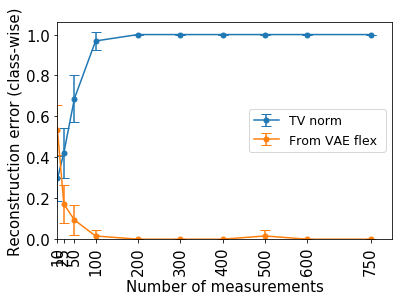

In [13]:
## Define what to plot
criterion = ['class_losses', 'mean']
retrieve_list = [['class_losses', 'mean'], ['class_losses', 'std']]
legend_base_regexs = [
    ('TV norm'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/tvnorm/0.0_cvxpy-constrEq-reweight1'),
    ('From VAE flex ' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_5_previous-and-random_flexible/"),

]
save_path = '../results/mnist_class_wise_linear.pdf'


## Plot
plt.figure(figsize=figsize)
legends = []
for legend, base, regex in legend_base_regexs:
    metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
    legends.append(legend)
    
#plt.plot([0.075625  , 0.03317602,0.03317602, 0.00895727, 0.00050625,])
## Prettify

# axis
plt.gca().set_ylim(bottom=0)
#plt.gca().set_ylim([0,0.1])
#plt.gca().set_ylim(bottom=0,top=0.02)

#plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_xlim([9, 800])

# labels, ticks, titles
ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
plt.xticks(ticks, labels, rotation=90)
plt.ylabel('Reconstruction error (class-wise)')
plt.xlabel('Number of measurements')

# Legend
plt.legend(legends, fontsize=12.5)

# Saving
utils.save_plot(is_save, save_path)


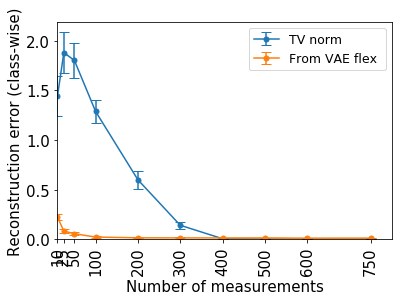

In [12]:
## Define what to plot
criterion = ['emd_losses', 'mean']
retrieve_list = [['emd_losses', 'mean'], ['emd_losses', 'std']]
legend_base_regexs = [
    ('TV norm'  , '../estimated/mnist/full-input/gaussian-reproducible/0.0/', '/tvnorm/0.0_cvxpy-constrEq-reweight1'),
    ('From VAE flex ' , '../estimated/mnist/full-input/gaussian-reproducible/0.0/' ,    "/vaeflex5-10-15-20-40-60-80-100/0.0_1.0_0.0_adam_0.01_0.9_False_1000_10_0.01_5_previous-and-random_flexible/"),

]
save_path = '../results/mnist_class_wise_linear.pdf'


## Plot
plt.figure(figsize=figsize)
legends = []
for legend, base, regex in legend_base_regexs:
    metrics_utils_mod.plot(base, regex, criterion, retrieve_list)
    legends.append(legend)
    
#plt.plot([0.075625  , 0.03317602,0.03317602, 0.00895727, 0.00050625,])
## Prettify

# axis
plt.gca().set_ylim(bottom=0)
#plt.gca().set_ylim([0,0.1])
#plt.gca().set_ylim(bottom=0,top=0.02)

#plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_xlim([9, 800])

# labels, ticks, titles
ticks = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
labels = [10, 25, 50, 100, 200, 300, 400, 500, 600,750]
plt.xticks(ticks, labels, rotation=90)
plt.ylabel('Reconstruction error (emd)')
plt.xlabel('Number of measurements')

# Legend
plt.legend(legends, fontsize=12.5)

# Saving
utils.save_plot(is_save, save_path)
